<a href="https://colab.research.google.com/github/shivendr7/ml/blob/GANs/ModelGAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, BatchNormalization, Dense, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
def build_discriminator():
  model=Sequential()
  model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(28,28,1)))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  return model

In [3]:
def build_generator():
  model=Sequential()
  n_nodes=64*7*7
  model.add(Dense(n_nodes, input_dim=100))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Reshape((7,7,64)))
  model.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=.2))
  model.add(BatchNormalization())
  model.add(Conv2D(1,(3,3),activation='tanh',padding='same'))
  model.summary()
  return model

In [4]:
64*7*7

3136

In [5]:
generator=build_generator()
discriminator=build_discriminator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3136)              316736    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3136)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3136)              12544     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [6]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
discriminator.trainable=False

In [7]:
GAN=Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0002,beta_1=0.5))

In [8]:
(train_images, train_labels), (_,_)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
train_images=(train_images-127.5)/127.5 #normalization

def generate_fake_samples(generator, latent_dim, n_batch):
  generated=generator.predict(tf.random.normal(shape=(n_batch, latent_dim)))
  return generated

def generate_latent_points(latent_dim, n_batch):
  return tf.random.normal(shape=(n_batch, latent_dim))

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
for i in range(1000):
  X_real, _=train_test_split(train_images, train_size=16)
  y_real=tf.ones(tf.constant([len(X_real)]))
  X_fake=generate_fake_samples(generator, 100, 16)
  y_fake=tf.zeros(tf.constant([len(X_fake)]))
  X,y=np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
  y=np.reshape(y, 32)
  d_loss=discriminator.train_on_batch(X,y)

In [26]:
discriminator.trainable=False

In [41]:
for i in range(10000):
  """
  X_real, _=train_test_split(train_images, train_size=16)
  y_real=tf.ones(tf.constant([len(X_real)]))
  X_fake=generate_fake_samples(generator, 100, 16)
  y_fake=tf.zeros(tf.constant([len(X_fake)]))
  X,y=np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
  y=np.reshape(y, 32)
  #d_loss=discriminator.train_on_batch(X,y)
  """
  X_gan=generate_latent_points(100, 16)
  y_gan=tf.ones((16, 1))
  g_loss=GAN.train_on_batch(X_gan, y_gan)
  print(g_loss, end=" ")

0.00012324478302616626 0.00011847545101772994 0.00012842539581470191 0.00014293276763055474 0.00012024368334095925 0.0001352558028884232 0.000125280290376395 0.0001294388493988663 0.00013028894318267703 0.00012964277993887663 0.00011416977940825745 0.00013338919961825013 0.00013154695625416934 0.00014166414621286094 0.00013731137732975185 0.0001146271315519698 0.00011956514208577573 0.00012591216363944113 9.823076834436506e-05 0.0001497835328336805 0.00011932929191971198 0.0001454233715776354 0.0001175656943814829 0.00010544150427449495 0.0001362358161713928 0.0001425977097824216 0.00013165151176508516 0.0001206192682730034 0.00013321786536835134 0.00012223386147525162 0.00011852641182485968 0.0001347868237644434 0.00012066452472936362 0.00011180902947671711 0.00011646014172583818 0.00011351747525623068 0.0001404358772560954 0.00013105804100632668 0.0001335426641162485 0.00012998982856515795 0.00013441831106320024 0.0001350957027170807 0.00013482282520271838 0.00010501436918275431 0.00

In [10]:
print(np.random.randint(1,100+1))

73


[[0.6180912]]


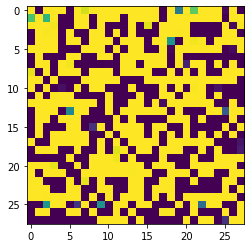

In [11]:
x=[[np.random.randint(1,100+1) for i in range(100)]] #seed
y=GAN.predict(x)
print(y)
yhat=generator.predict(x)
y_img=(yhat*127.5+127.5).astype('uint8')
plt.imshow(y_img.reshape(28,28))

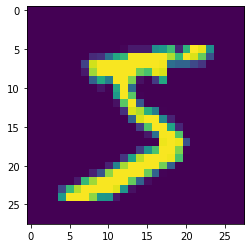

In [17]:
plt.imshow((train_images[0]*127.5+127.5).reshape(28,28))

In [25]:
dig_5=(train_images[10]).reshape(1,28,28,1)
discriminator.predict(dig_5)


array([[0.9998126]], dtype=float32)

In [43]:
X, _=train_test_split(train_images, train_size=16)
discriminator.predict(X), X.shape

(array([[0.9997897 ],
        [0.9999515 ],
        [0.99973226],
        [0.999949  ],
        [0.99979013],
        [0.9999387 ],
        [0.99980235],
        [0.99982417],
        [0.9997071 ],
        [0.9998731 ],
        [0.9999352 ],
        [0.99993515],
        [0.9999751 ],
        [0.99991965],
        [0.99840516],
        [0.9995148 ]], dtype=float32), (16, 28, 28, 1))

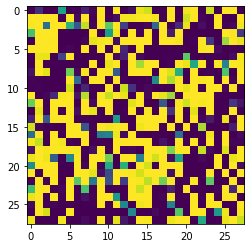

In [42]:
X=generate_latent_points(100, 2)
img_res= generator.predict(X)
plt.imshow((img_res[0]*127.5+127.5).reshape(28,28))

[[  1  32   0   0 146   0   0  22   4 254   0 254   0   9 246 236   0   1
  254   0 249 254   0 236   0 254 255   0]
 [254 254 254 255   0 254   5 254   0 255   0   9 250 250 253 254 250   0
  254   0 236 254   3   0 254   1   0 254]
 [252 254  93 254 254 166  70 231   4 255 193 254  47   0   0   4  88 254
    1  27 247   0   9   0 254   2   5 250]
 [180 254 254 254   0   0   0   0 254   0 142 249   0 254   4 254   0 254
   20 254   0   0   0   0   0 254 253  42]
 [  0 254 255 253   0   0   0   4 244 251 254   8 254 254 254 254   0 255
  254 251   0   2 253  39   0 216 254 247]
 [254 254 254 255   0   3   0 254   0 255   0 254  26   0 253   0   0   0
    0   0   0   0 252 254   7   0   2   1]
 [  0 247 246   0  49 254   0   0   0   0 254   6  22 254   6   0   0   0
    1   0 191   0   0   1   1   0   8 249]
 [  0 254   0   1   1   0   0   0 254   0 246 254   1 254 220 254 254   0
    4 254 247 152 254   1 254 112 254 252]
 [ 12 254 243   0   0 201   6 251   0 254 254  73   0 254 255 25

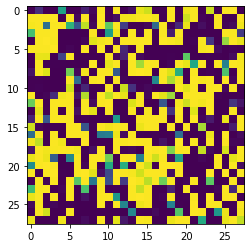

In [50]:
print((img_res[0]*127.5+127.5).astype('uint8').reshape(28,28))
plt.imshow((img_res[0]*127.5+127.5).astype('uint8').reshape(28,28))